In [1]:
import matplotlib
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import os


from ormhw.core import BoundingBox, DATA_DIR
from ormhw.gebco import import_gebco
from ormhw.core import CE01, CE02, CE04, NH_LINE, CAPE_BLANCO, COLUMBIA_RIVER

from ormhw.core import FIGURE_DIR

In [2]:
gebco_filepath = os.path.join(os.path.join(DATA_DIR,'gebco'),'GEBCO_2023.nc')

lat_min = 40
lat_max = 48
lon_min = -126.75
lon_max = -123.75
bbox = BoundingBox(lat_min = lat_min, lat_max = lat_max, lon_min = lon_min, lon_max = lon_max)

In [3]:
figsize = (3.1,5)
dpi = 600
filename = 'roi'
filetype = 'jpg'
matplotlib.rcParams.update({'font.size': 8})

In [4]:
%%time
gebco = import_gebco(filepath = gebco_filepath,bounding_box = bbox)
x, y = np.meshgrid(gebco.lon, gebco.lat)
z = gebco.depth

CPU times: user 45.5 ms, sys: 154 ms, total: 199 ms
Wall time: 1.04 s


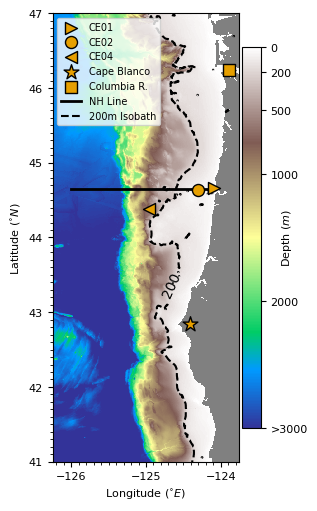

In [5]:
# Colormap and text settings.
cmap = matplotlib.colormaps.get_cmap('terrain_r') 
cmap.set_under('gray')

# Make plot.
fig, ax = plt.subplots(1,1, figsize = figsize, constrained_layout = True)

p= ax.pcolormesh(x,y,z, vmin = -0.0001, vmax = 3000, cmap = cmap, zorder = 0)

ax.set_ylim(41,47)
ax.set_xlim(-126.25,-123.75)
ax.set_box_aspect((47-41)/(-123.75 + 126.25))

cbar = fig.colorbar(p, ax = ax, location = 'right', shrink = 0.85, pad =  0.01, label = f'Depth ($m$)', ticks = [0, 200,500,1000,2000,3000])
cbar.set_label(f'Depth ($m$)',labelpad = -20)
cbar.ax.set_yticklabels(['0','200','500','1000','2000','>3000'])
cbar.ax.invert_yaxis()
ax.scatter(CE01.lon, CE01.lat, s = 75, color = (230/255,159/255,0/255), marker = '>',edgecolors = 'black', zorder = 3, label = 'CE01', linewidth = 1)
ax.scatter(CE02.lon, CE02.lat, s = 75, color = (230/255,159/255,0/255), marker = 'o',edgecolors = 'black', zorder = 3, label = 'CE02', linewidth = 1)
ax.scatter(CE04.lon, CE04.lat, s = 75, color = (230/255,159/255,0/255), marker = '<',edgecolors = 'black', zorder = 3, label = 'CE04',linewidth = 1)
ax.scatter(CAPE_BLANCO.lon, CAPE_BLANCO.lat, s = 125, color = (230/255,159/255,0/255), marker = '*',edgecolors = 'black', zorder = 3, label = 'Cape Blanco',linewidth = 1)
ax.scatter(COLUMBIA_RIVER.lon, COLUMBIA_RIVER.lat, s = 75, color = (230/255,159/255,0/255), marker = 's',edgecolors = 'black', zorder = 3, label = 'Columbia R.',linewidth = 1)
ax.plot([NH_LINE.lon_min,NH_LINE.lon_max],[NH_LINE.lat,NH_LINE.lat],color = 'black', zorder = 2,linewidth = 2,label = 'NH Line', linestyle = '-')

contours = ax.contour(x,y,z,colors = ['black'], levels = [200],linestyles = ['--'])
ax.clabel(contours, inline=True, fontsize=10)



ax.plot([],[],color = 'black',linestyle = '--',label = '200m Isobath')


ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(1))

ax.set_xlabel(r'Longitude ($^{\circ}E$)')
ax.set_ylabel(r'Latitude ($^{\circ}N$)')
ax.legend(loc = 'upper left',fontsize = 7)

plt.savefig(os.path.join(FIGURE_DIR,f"{filename}.{filetype}"),dpi = dpi)